# Linear Models

In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
from numpy import ndarray
from numpy.random import randint
import pandas as pd
from time import sleep
np.random.seed(3)
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

## Linear function

Consider the function of a line.  
It's a *linear function* that maps the value of x to that of y, and in it's usually written as:

\begin{align}
  y=f(x)=mx+b
\end{align}

Where:
- *y* is the dependent variable
- *x* is the independent variable
- *m* is the slope
- *b* is the intercept

It is named *linear* simply because it can be plotted as a straight line. Let's take a look at some linear functions!

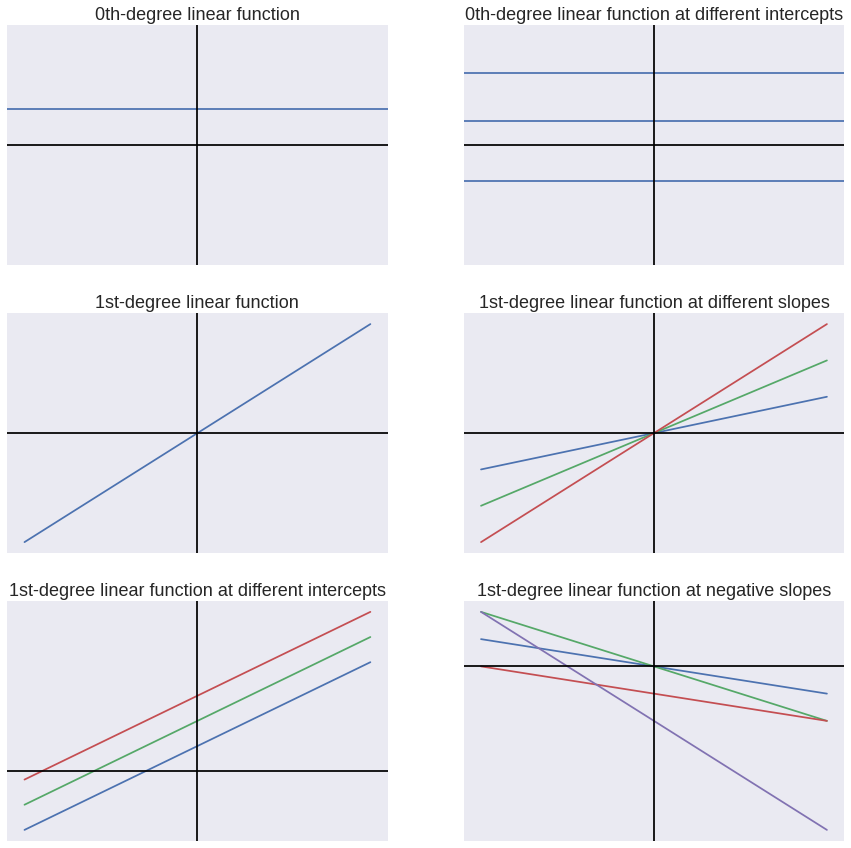

In [2]:
plt.style.use('seaborn')
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

x = np.linspace(-10, 10, 50)
n = 3 # random constant
axs[0,0].axhline(y=n)
axs[0,1].axhline(y=2)
axs[0,1].axhline(y=6)
axs[0,1].axhline(y=-3)
axs[1,0].plot(x, 1*x+0)
axs[1,1].plot(x, x)
axs[1,1].plot(x, 2*x)
axs[1,1].plot(x, 3*x)
axs[2,0].plot(x, x+3)
axs[2,0].plot(x, x+6)
axs[2,0].plot(x, x+9)
axs[2,1].plot(x, -x)
axs[2,1].plot(x, -2*x)
axs[2,1].plot(x, -x-10)
axs[2,1].plot(x, -4*x-20)

axs[0,0].set_ylim(-10, 10)
axs[0,1].set_ylim(-10, 10)
axs[0,0].set_xlim(-10, 10)
axs[0,1].set_xlim(-10, 10)
axs[0,0].set_title(
    '0th-degree linear function', fontsize=18
    )
axs[0,1].set_title(
    '0th-degree linear function at different intercepts', fontsize=18
    )
axs[1,0].set_title(
    '1st-degree linear function', fontsize=18
    )
axs[1,1].set_title(
    '1st-degree linear function at different slopes', fontsize=18
    )
axs[2,0].set_title(
    '1st-degree linear function at different intercepts', fontsize=18
    )
axs[2,1].set_title(
    '1st-degree linear function at negative slopes', fontsize=18
    )
for ax in axs.flatten():
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

Formarly it's both a polynomial function of degree zero or one and a linear map. But what does it mean?

A polynomial function is just a function with multiple *(=poly)* terms *(=nomia)*, written in the form:

\begin{align}
  f(x)=a_0x^0+a_1x^1+a_2x^2+...+a_{n-1}x^{n-1}+a_nx^n
\end{align}

Let's take a look at the 2 possibilities:

- 0th degree: $f(x)=x^0b$
- 1st degree: $f(x)=x^0b+mx^1$

The degree of the polynomial function is just given by the highest exponent in the function. Let's take a look at the graphs below for some visual insight!

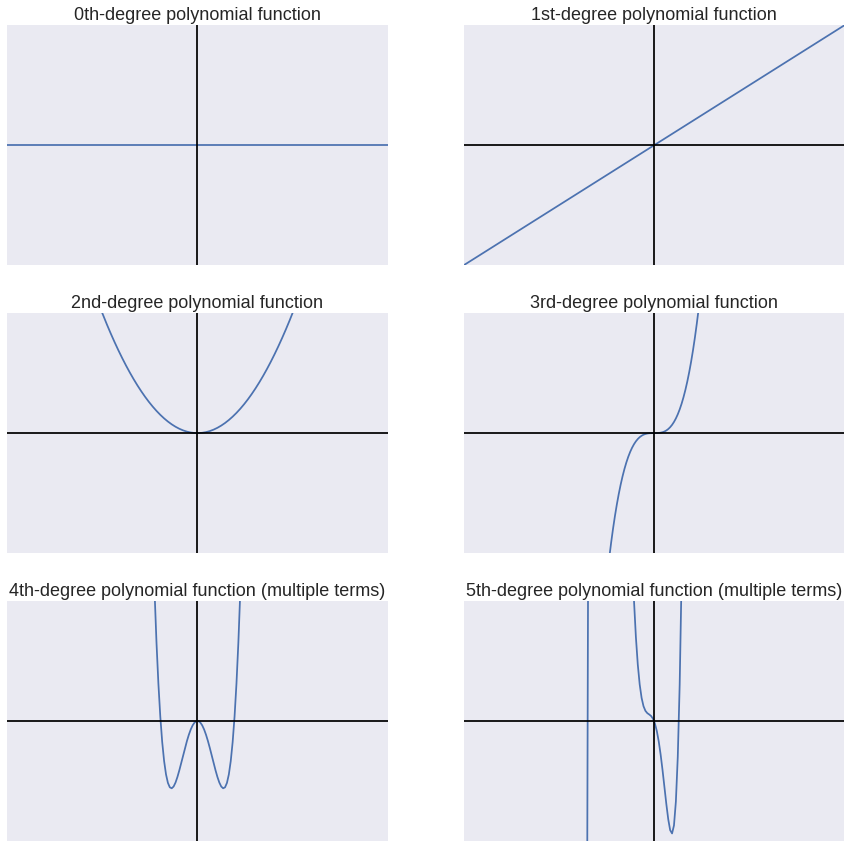

In [3]:
plt.style.use('seaborn')
fig, axs = plt.subplots(3, 2, figsize=(15,15))
x = np.linspace(-100, 100, 1000)
axs[0,0].axhline(0)
axs[0,1].plot(x, 5*x)
axs[1,0].plot(x, x**2)
axs[1,1].plot(x, x**3)
axs[2,0].plot(x, x**4-15*x**2)
axs[2,1].plot(x, x**5+6*x**4-+10*x**3-25*x**2-20*x)

axs[0,0].set_title('0th-degree polynomial function', fontsize=18)
axs[0,1].set_title('1st-degree polynomial function', fontsize=18)
axs[1,0].set_title('2nd-degree polynomial function', fontsize=18)
axs[1,1].set_title('3rd-degree polynomial function', fontsize=18)
axs[2,0].set_title('4th-degree polynomial function (multiple terms)',
    fontsize=18
    )
axs[2,1].set_title('5th-degree polynomial function (multiple terms)',
    fontsize=18
    )

for i, ax in enumerate(axs.flatten()):
    if i != 0: ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_xlim(-20, 20)
    ax.set_ylim(-100, 100)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

From these graphs it's clear why we only the first-degree polynomial function is the one used, and why it's named linear!

Now, a map... the *map* is just a function which "maps" the input values to the output. A *linear map* is just a particular map which preserver some properties of of the vector space. For a simple visual intuition, imagine a function that transforms all the points of a cartesian plane without curving the lines and keeping the origin of the axis in the same place.

## Linear Regression

---

*A linear model is nothing more than a linear function whose parameters are estimated from data using a loss function through the gradient descent algorithm.*

---

### Theory


#### **Jargon**

Let’s start with some jargon…

The linear regression can be classified depending on:
- The number of independent variables x:
    - if number of $x = 1$: *simple linear regression*
    - if number of $x > 1$: *multiple linear regression*
- number of dependent varibales y:
    - if number of $y = 1$: *univariate linear regression*
    - if number of $y > 1$: *multivariate linear regression*

... and remember:
- $x$ = independent variable = explanatory variable
- $y$ = dependent variable = response variable

Let's analyze the math to see some pattern...

N.B., since bold notation often is not clear on screen, I’ll use the arrow notation for vectors. Moreover, hat notation will be used for predicted values, therefore:

- $a$ = scalar
- $\vec a$ = vector
- $A$ = matrix
- $y$ = actual
- $\hat y$ = predicted

Let's analyze the math to see some pattern...

#### **Simple linear regression**
*(function with a single explanatory variable and a single response variable)*

The (univariate) simple linear regression is a simple function which maps a single dependent variable to a single independent variable:

\begin{align}
  y=f(x)
\end{align}

You should be already familiar with it: it's just a line! Now, for each observation $i$, the function assume the form of:

\begin{align}
  y_i=\beta_0+\beta_1x_i+\epsilon_i
\end{align}

Where:
- $\beta_0,\beta_1$ are the *parameters* (aka *weights*):
    - that is, the variables that we need to "tweak" in order to fit the model
- $\epsilon$ is the *disturbance term* (aka *error variable*):
    - that is, an unobserved random variable that adds "noise" to the model

This formula should look familiar too! Just image if we had called $b$ the term $\beta_0$, $m$ the $\beta_1$ term, and got rid of $\epsilon$, the concept is indeed actually the same of $y=mx+b$, it’s just the function of a line, but written in a different way.

Until now we have spoken about a single observation, but the model is actually fitted to many observations, so we can stack each observation with matrix notation. This has also a practical meaning in computer science (vectorized parallel computation performs way better than endless serial iterations!). The matrix notation is:

\begin{align}
  \begin{pmatrix}
    y_1\\y_2\\y_3\\\vdots\\y_n
  \end{pmatrix} = 
  \begin{pmatrix}
    1&x_1\\1&x_2\\1&x_3\\\vdots&\vdots\\1&x_n
  \end{pmatrix}\cdot
  \begin{pmatrix}
    \beta_0\\\beta_1
  \end{pmatrix} +
  \begin{pmatrix}
    \epsilon_1\\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ \epsilon_n
  \end{pmatrix}
\end{align}

If you feel confused about the ones… just review the dot product rules:

\begin{align}
  \beta_01+\beta_1x_i=
  \begin{pmatrix}
    1&x_i
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    \beta_0\\\beta_1
  \end{pmatrix}
\end{align}

The matrices above can be simplified in another compact (and human-readable) matrix notation:

\begin{align}
\vec y=X\vec\beta+\vec\epsilon
\end{align}

We’ve seen a lot of math, but what does this actually mean? What do those vectors and matrices represent? Well, the vectorial notation is just used to group all the predictions, each of which is mapped to their explanatory variables. This means, we’re just talking about lines! But… shouldn’t they be many lines? Well, no. We use multiple observations to fit the best line, this means that even if we “try” multiple lines, at the end with simple linear regression, we get only one simple line in a 2D space.

Take a look at this picture. The dots are the actual values, the line is just the best fit to those data.

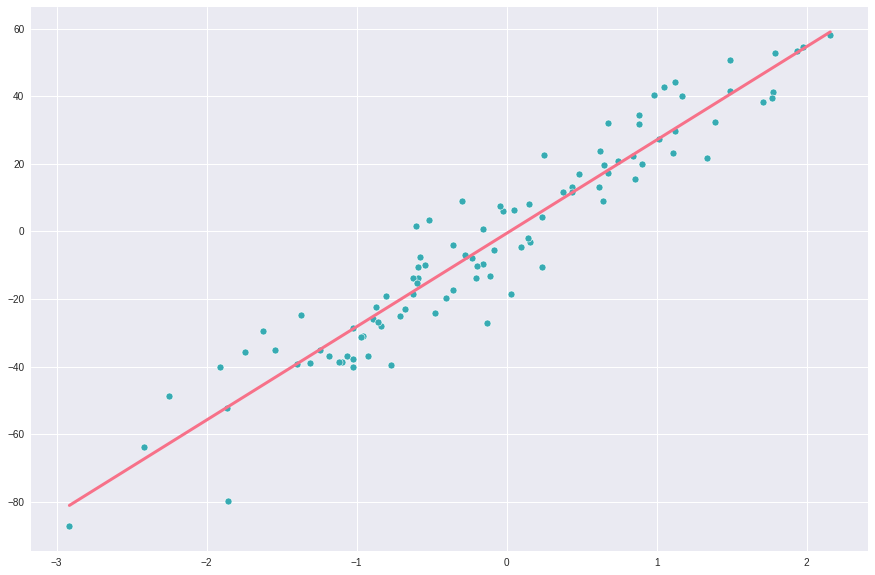

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=3)
regressor = LinearRegression()
regressor.fit(X, y)

plt.style.use('seaborn')
plt.figure(figsize=(15,10))
sns.scatterplot(x=X.squeeze(), y=y, color=cmap.colors[140])
X = np.linspace(min(X), max(X), 1000)
plt.plot(X, X*regressor.coef_+regressor.intercept_, color=cmap.colors[0], linewidth=3)

plt.show()

#### **Multiple linear regression**  
*(function with multiple explanatory variables and a single response variable)*

The (univariate) multiple linear regression is a function which maps many independent variables to a single dependent variable:

\begin{align}
  y=f(x_1,x_2,...,x_n)
\end{align}

It may seem intimidating, but it really just means that we have multiple x values, that is, multiple features, that once multiplied with the parameters and summed up will give us our prediction!

For each observation $i$, the function assumes the form of:

\begin{align}
  y_i=\beta_0+\beta_1x_{i,1}+\beta_2x_{i,2}+...+\beta_nx_{i,n}+\epsilon_i
\end{align}

If you remember a bit of linear algebra, you’ll know that we can write this as a dot product, in particular:

\begin{align}
  \beta_0+\beta_1x_{1}+\beta_2x_{2}+...+\beta_nx_{n}=
  \begin{pmatrix}
    x_0&x_1&x_2&\cdots&x_n
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    \beta_0\\\beta_1\\\beta_2\\\vdots\\\beta_n
  \end{pmatrix}=
  \vec x^{\,T}\vec\beta
\end{align}

Wait… what’s that “T”? It just means that we take the transpose of the matrix. That’s a fancy way to say we swap the rows of the matrix with the columns. This is needed in order to be able to get a dot product between 2 vectors or matrices.

Therefore, each observation $i$ can be rewritten in the more compact notation:

\begin{align}
  y_i=\vec x_i^{\,T}\vec\beta+\epsilon_i
\end{align}

Now, as for simple linear regression, we stack all the observations in matrix notation:

\begin{align}
  \begin{pmatrix}
    y_1\\ y_2 \\ y_3 \\ \vdots \\ y_n
  \end{pmatrix} = 
  \begin{pmatrix}
    \vec x^{\,T}_1\\\vec x^{\,T}_2\\\vec x^{\,T}_3\\\vdots\\\vec x^{\,T}_n
  \end{pmatrix} \cdot
  \begin{pmatrix}
    \beta_1\\ \beta_2 \\ \beta_3 \\ \vdots \\ \beta_q
  \end{pmatrix} +
  \begin{pmatrix}
    \epsilon_1\\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ \epsilon_n
  \end{pmatrix}
\end{align}

But since the $x$ terms are just transposed column vectors, this means they’re just the rows of the new matrix!

\begin{align}
  \begin{pmatrix}
    y_1\\ y_2 \\ y_3 \\ \vdots \\ y_n
  \end{pmatrix} = 
  \begin{pmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,q} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,q} \\
    x_{3,1} & x_{3,2} & \cdots & x_{3,q} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_{n,1} & x_{n,2} & \cdots & x_{n,q}
  \end{pmatrix} \cdot
  \begin{pmatrix}
    \beta_1\\ \beta_2 \\ \beta_3 \\ \vdots \\ \beta_q
  \end{pmatrix} +
  \begin{pmatrix}
    \epsilon_1\\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ \epsilon_n
  \end{pmatrix}
\end{align}

Luckily, we can use compact matrix notation here too:

\begin{align}
  \vec y=X\vec\beta+\vec\epsilon
\end{align}

Yes, yes, we got all this strange matrix stuff, but what’s the actual meaning here? It cannot be a line with all those different $\beta x$ terms! Indeed it isn’t. Let’s take the simplest example of multiple linear regression:

\begin{align}
  y_i=\beta_0+\beta_1x_{i,1}+\beta_2x_{i,2}
\end{align}

It’s almost the same as simple linear regression. It just got one extra term. In simple linear regression we got 2 variables: $x, y$. This means we were in a 2D space. Here we got 3 variables: $x_1, x_2, y$. This means that we are in a 3D space. In simple regression we got a line, here we get, guess what? A plane:

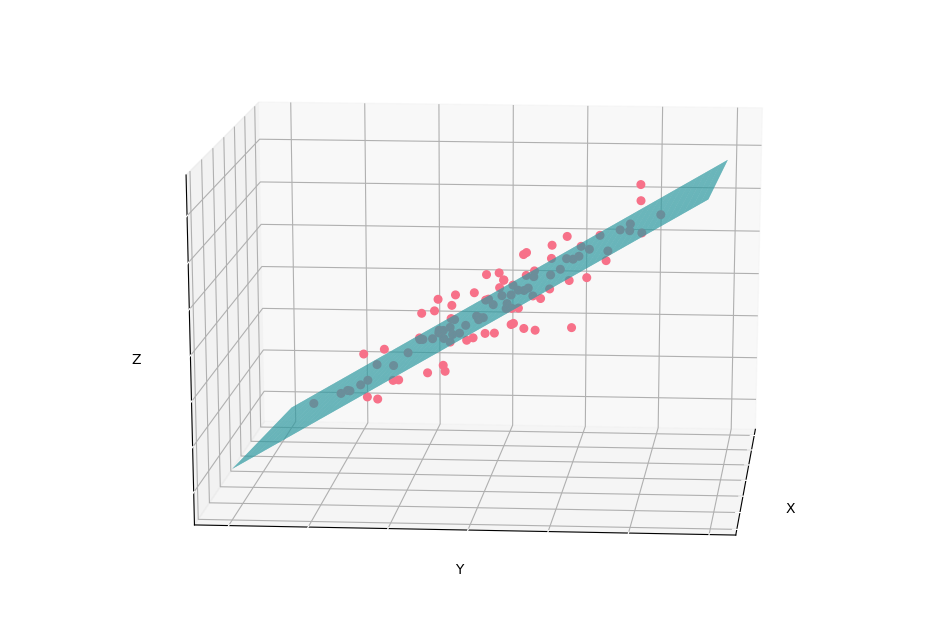

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=3
)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)

plt.style.use('default')
fig = plt.figure(figsize=(12,8))

Xm, Ym = np.meshgrid(np.arange(-3.0, 3.0, 0.1), np.arange(-3.0, 3.0, 0.1))
Zm = np.array(regressor.coef_[0]*np.ravel(Xm) + regressor.coef_[1]*np.ravel(Ym)\
              + regressor.intercept_).reshape(Xm.shape)

ax = plt.axes(projection='3d')
ax.plot_surface(Xm, Ym, Zm,
    color=cmap.colors[140], alpha=1, rstride=1, cstride=1
    )
ax.scatter(xs=X[:,0], ys=X[:,1], zs=y,
    s=30, marker='o', color=cmap.colors[0], alpha=1
    )
ax.tick_params(color='white', labelcolor='white') 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15,5)
# run it in a .py file to manipulate the 3D graph with the mouse
plt.show()

But… what if we got one more term?

\begin{align}
  y_i=\beta_0+\beta_1x_{i,1}+\beta_2x_{i,2}+\beta_3x_{i,3}
\end{align}

Here we need to introduce another concept to generalize it to n more terms. This is another fancy word defined with even stranger words, but it’s actually pretty simple: the *hyperplane*.

***Hyperplane***: *a subspace of dimension n-1 relative to its ambient space.*

That in common words means just an object having one dimension less of its space, such as: a point on the number line, a line on a 2D plane, a plane on a 3D space, etc…

So, actually what we get with linear regression, whether, simple or multiple, is just a hyperplane of $n-1$ dimensions, where n is just the number of dimensions of its ambient space. 2 variables $x,y$? 2D space, 1D hyperplane (a line). 3 variables $x,y,z$? 3D space, 2D hyperplane (a plane).

#### **Multivariate Linear Regression**
*Multivariate (multiple) linear regression it’s a function which maps many independent variables to many correlated dependent variables:*

Multivariate (multiple) linear regression it’s a function which maps many independent variables to many correlated dependent variables:

\begin{align}
  y_0,y_1,y_2,...,y_n=f(x_1,x_2,...,x_n)
\end{align}

For each observation $i$, the function assumes the form of:

\begin{align}
  y_{i,1},y_{i,2},y_{i,3},...,y_{i,n}=\beta_0+\beta_1x_{i,1}+\beta_2x_{i,2}+...+\beta_nx_{i,n}+\epsilon_i
\end{align}

As seen above, each observation $i$ can be rewritten as a dot product, but since the dependent variables are multiple, we have a lot of vectors:

\begin{align}
  \vec y_i=\vec x_i^{\,T}\vec\beta+\vec\epsilon_i
\end{align}

Stacking all the $i$ observations in matrix notation:

\begin{align}
  \begin{pmatrix}
    \vec y_1\\\vec y_2\\\vec y_3\\\vdots\\\vec y_n
  \end{pmatrix} = 
  \begin{pmatrix}
    \vec x^{\,T}_1\\\vec x^{\,T}_2\\\vec x^{\,T}_3\\\vdots\\\vec x^{\,T}_n
  \end{pmatrix} \cdot
  \begin{pmatrix}
    \vec\beta_1\\\vec\beta_2\\\vec\beta_3\\\vdots\\\vec\beta_m
  \end{pmatrix} +
  \begin{pmatrix}
    \epsilon_1\\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ \epsilon_n
  \end{pmatrix}
\end{align}

This seems to be the same as the stacked matrix notation of multiple regression. However, notice that all $\vec y$ terms here are vectors! So, **for each $\vec y$** in the first column vector, we have:

\begin{align}
  \begin{pmatrix}
    y_1\\ y_2 \\ y_3 \\ \vdots \\ y_n
  \end{pmatrix} = 
  \begin{pmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,q} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,q} \\
    x_{3,1} & x_{3,2} & \cdots & x_{3,q} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_{n,1} & x_{n,2} & \cdots & x_{n,q}
  \end{pmatrix} \cdot
  \begin{pmatrix}
    \beta_1\\ \beta_2 \\ \beta_3 \\ \vdots \\ \beta_q
  \end{pmatrix} +
  \begin{pmatrix}
    \epsilon_1\\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ \epsilon_n
  \end{pmatrix}
\end{align}

Indeed, as the multiple linear regression was a generalization in multiple dimensions of the simple linear regression, the multivariate linear regression is a generalization of the univariate linear regression. That is, it isn’t a separate statistical linear model, but just a compact way of simultaneously writing several multiple linear regression models. In the exact same way as we stacked the multiple observations in the models above, we can stack models!

Therefore, considering all observations, writing it in way too long explicit matrix notation, (but I believe in finding patterns in math notation, rather than just studying all the formal stuff) we have:

\begin{align}
  \begin{pmatrix}
    y_{1,1} & y_{1,2} & \cdots & y_{1,p} \\
    y_{2,1} & y_{2,2} & \cdots & y_{2,p} \\
    y_{3,1} & y_{3,2} & \cdots & y_{3,p} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    y_{n,1} & y_{n,2} & \cdots & y_{n,p}
  \end{pmatrix} = 
  \begin{pmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,q} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,q} \\
    x_{3,1} & x_{3,2} & \cdots & x_{3,q} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_{n,1} & x_{n,2} & \cdots & x_{n,q}
  \end{pmatrix}
  \begin{pmatrix}
    \beta_{1,1} & \beta_{1,2} & \cdots & \beta_{1,p} \\ 
    \beta_{2,1} & \beta_{2,2} & \cdots & \beta_{2,p} \\
    \beta_{3,1} & \beta_{3,2} & \cdots & \beta_{3,p} \\
    \vdots      & \vdots      & \ddots & \vdots      \\
    \beta_{q,1} & \beta_{q,2} & \cdots & \beta_{q,p}
  \end{pmatrix} +
  \begin{pmatrix}
    \epsilon_{1,1} & \epsilon_{1,2} & \cdots & \epsilon_{1,p} \\
    \epsilon_{2,1} & \epsilon_{2,2} & \cdots & \epsilon_{2,p} \\
    \epsilon_{3,1} & \epsilon_{3,2} & \cdots & \epsilon_{3,p} \\
    \vdots         & \vdots        & \ddots & \vdots        \\
    \epsilon_{n,1} & \epsilon_{n,2} & \cdots & \epsilon_{n,p}
  \end{pmatrix}
\end{align}

Luckily, also this can be conveniently compacted to:

\begin{align}
  Y=XB+\Xi
\end{align}

...wait, why did lowercase epsilon ($\epsilon$) become uppercase xi ($\Xi$)? Because uppercase epsilon is used for matrix analogue of SSE (don't worry about this). Blame staticians for the inconsistent notation!

Ok, ok, a lot of matrices, but what’s the visual insight here? Well, the fact that is multiple means that we’re in more than 2D. The fact that is multivariate simply means that there’s more than one hyperplane!

So, for a simple and viewable example, in the case of:

\begin{align}
  y_{i,1},y_{i,2}=\beta_0+\beta_1x_{i,1}+\beta_2x_{i,2}
\end{align}

We have two 2D hyperplanes in a 3D ambient space:

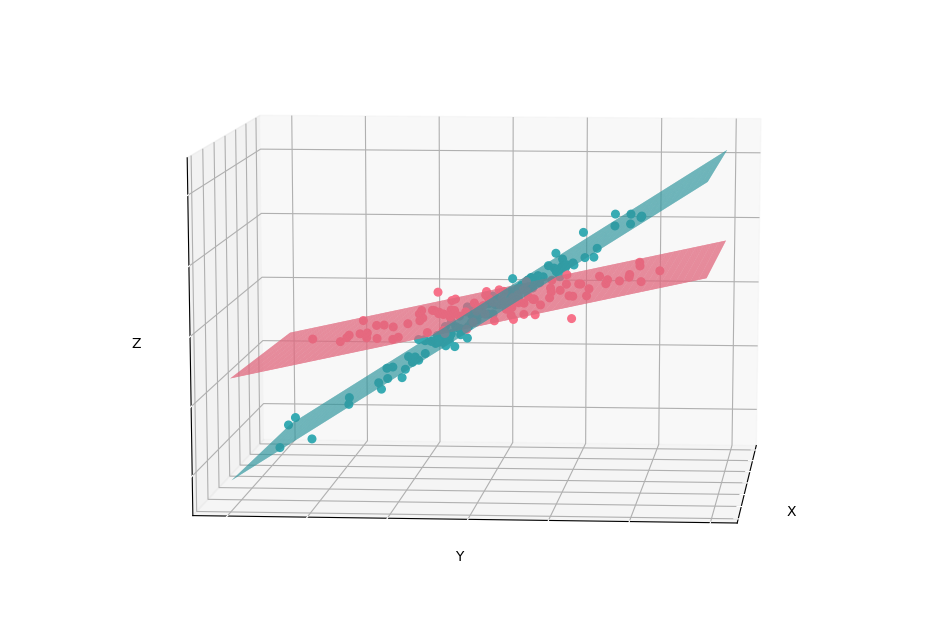

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

X1, y1 = make_regression(n_samples=100, n_features=2, noise=10, random_state=3)
X1_train, X1_val, y1_train, y1_val = train_test_split(
    X1, y1,
    test_size=0.2,
    random_state=3
)
X2, y2 = make_regression(n_samples=100, n_features=2, noise=10, random_state=9)
X2_train, X2_val, y2_train, y2_val = train_test_split(
    X2, y2,
    test_size=0.2,
    random_state=3
)

regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor1.fit(X1_train, y1_train)
regressor2.fit(X2_train, y2_train)
y_pred1 = regressor1.predict(X1_val)
y_pred2 = regressor2.predict(X2_val)

plt.style.use('default')
fig = plt.figure(figsize=(12,8))

Xm, Ym = np.meshgrid(np.arange(-3.0, 3.0, 0.1), np.arange(-3.0, 3.0, 0.1))
Zm1 = np.array(regressor1.coef_[0]*np.ravel(Xm) + regressor1.coef_[1]*np.ravel(Ym) + regressor1.intercept_).reshape(Xm.shape)
Zm2 = np.array(regressor2.coef_[0]*np.ravel(Xm) + regressor2.coef_[1]*np.ravel(Ym) + regressor2.intercept_).reshape(Xm.shape)

ax = plt.axes(projection='3d')
ax.plot_surface(Xm, Ym, Zm1, color=cmap.colors[0], alpha=1, rstride=1, cstride=1)
ax.plot_surface(Xm, Ym, Zm2, color=cmap.colors[140], alpha=1, rstride=1, cstride=1)
ax.scatter(xs=X1[:,0], ys=X1[:,1], zs=y1, s=30, marker='o', color=cmap.colors[0], alpha=1)
ax.scatter(xs=X2[:,0], ys=X2[:,1], zs=y2, s=30, marker='o', color=cmap.colors[140], alpha=1)
ax.tick_params(color='white', labelcolor='white') 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10,5)

plt.show()

We spoke about multivariate (multiple) linear regression, but doesn’t it implies that multivariate simple linear regression exists too? Yes, it does. But the reason why nobody talks about it, is that it is not used, and just (as for simple linear regression) a particular case of a more general one. But just for completeness, this would be its form for a single observation $i$:

\begin{align}
  y_{i,1},y_{i,2},y_{i,3},...,y_{i,n}=\beta_0+\beta_1x_{i,1}+\epsilon_i
\end{align}

Therefore, if we take the simplest case:

\begin{align}
  y_{i,1},y_{i,2}=\beta_0+\beta_1x_{i,1}+\epsilon_i
\end{align}

Its graphical meaning is:

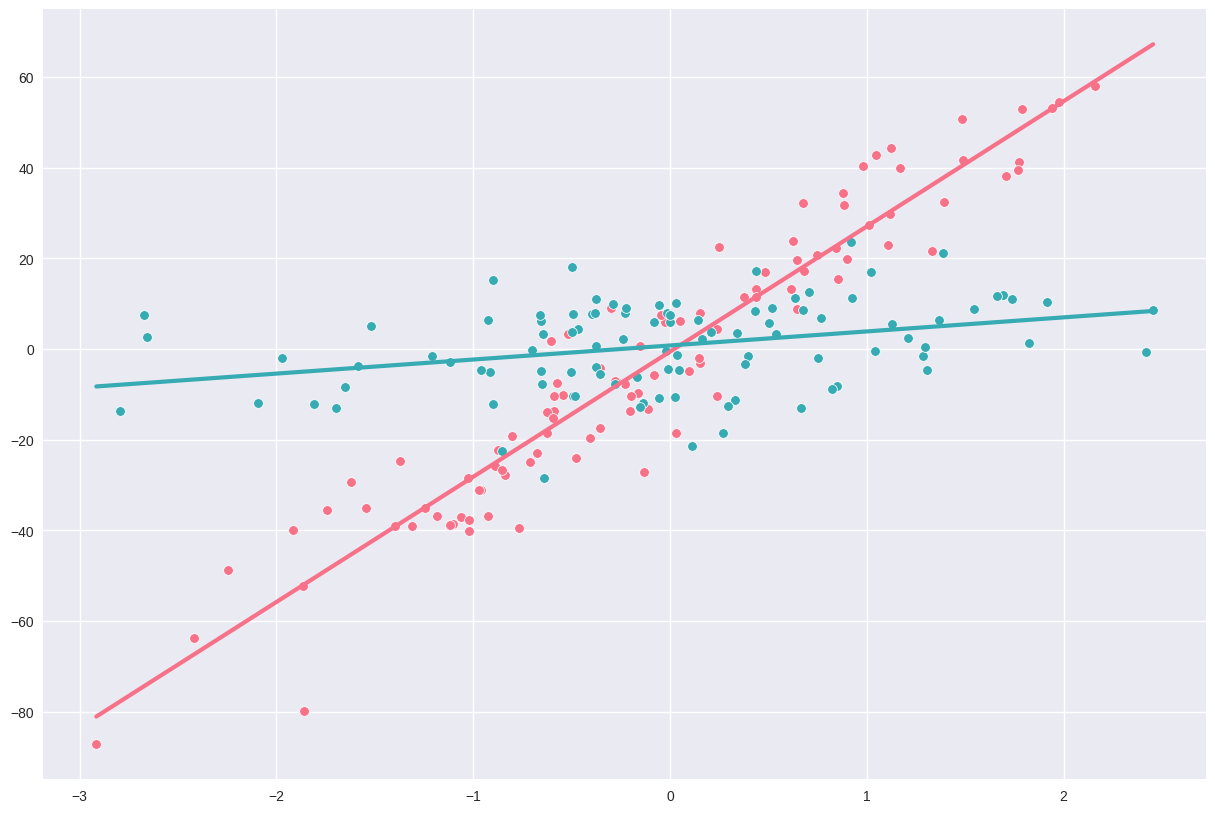

In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X1, y1 = make_regression(n_samples=100, n_features=1, noise=10, random_state=3)
X2, y2 = make_regression(n_samples=100, n_features=1, noise=10, random_state=9)

regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor1.fit(X1, y1)
regressor2.fit(X2, y2)

plt.style.use('seaborn')
plt.figure(figsize=(15,10))
sns.scatterplot(x=X1.squeeze(), y=y1, color=cmap.colors[0])
sns.scatterplot(x=X2.squeeze(), y=y2, color=cmap.colors[140])
X = np.linspace(min(min(X1), min(X2)), max(max(X1), max(X2)), 1000)
plt.plot(X, X*regressor1.coef_+regressor1.intercept_, color=cmap.colors[0], linewidth=3)
plt.plot(X, X*regressor2.coef_+regressor2.intercept_, color=cmap.colors[140], linewidth=3)

plt.show()

# To review and rewrite from here on:

#### **The loss function**
...fine, enough matrices for a month, but how does this thing really works?

Well, even if for simple linear regression the parameteres can be estimated through calculus, this cannot be applied to more complex cases. In those cases, the determination of the parameters (i.e. the fitting the line) happens in a clever way: the minimization of a *loss function*.

A **loss function** is nothing more than a function that maps the predictions obtained by the model to a measure of the error. The error in this case is some mathematic elaboration of the *residuals*.

A **residual** is nothing more than the difference between predicted y value (the one on the line) and the actual y value. 

Common ways to calculate the error are:

The **sum of residuals**:
\begin{align}
  \sum_{i=1}^n {(y_i-f(x_i))}
\end{align}

The **sum of absolute residuals**
\begin{align}
  \sum_{i=1}^n {|y_i-f(x_i)|}
\end{align}

The **sum of squared residuals**:
\begin{align}
  \sum_{i=1}^n {(y_i-f(x_i))^2}
\end{align}

The **root of sum of squared residuals**:
\begin{align}
  \sqrt {\sum_{i=1}^n {(y_i-f(x_i))^2}}
\end{align}

Now, the jargon here is often very ambiguous and redundant, just a small reminder to guide you in this statistical nomenclature mess:
- SSE (sum of squared error) = RSS (residual sum of the squares) = SSR (sum of squared residuals)
- RMSE (root mean squared error) = RSSR (root of sum of squared residuals)

What about the *Euclidean distance* and the *squared Euclidean distance*? Some articles mentions that you actually minimize this instead, well, it's true! Just take a look at this:

The generalized **Euclidean distance**:
\begin{align}
  d(p,q)=\sqrt {\sum_{i=1}^n {(q_i-p_i)^2}}
\end{align}

The generalized **squared Euclidean distance**:
\begin{align}
  d^2(p,q)=\sum_{i=1}^n {(q_i-p_i)^2}
\end{align}

Where $q,p$ are 2 points of a $n$ Euclidean space. It's easy to note that the squared Euclidean distance has the same meaning of the sum of squared residuals and that the Euclidean distance has the same meaning of the root of sum of squared residuals. Indeed, we're just calculating the difference between the predicted y and the actual y, which is, guess what, an Euclidean distance!

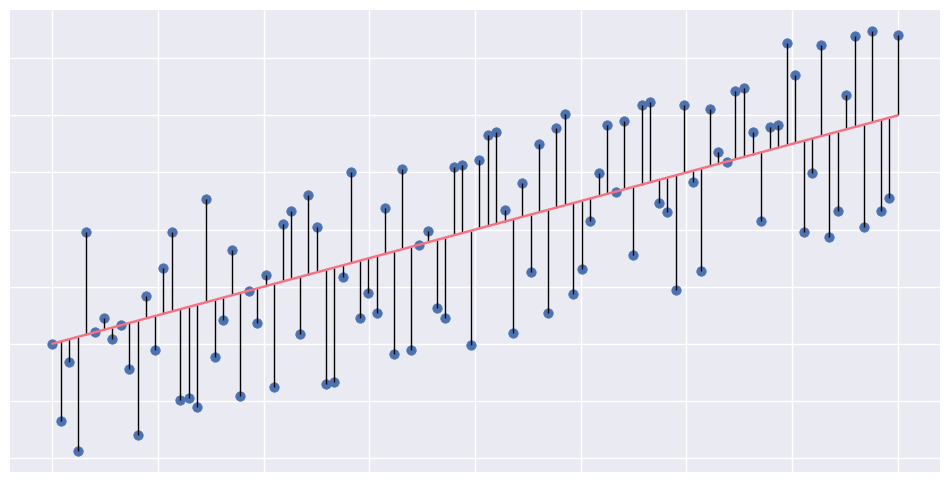

In [8]:
x = np.linspace(-10, 10, 100)
y = x
dy = [randint(-10,10) for i in range(100)]
plt.style.use('seaborn')
_, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, color=cmap.colors[2])
ax.scatter(x,y+dy)
ax.vlines(x,y,y+dy, linewidth=1)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()


OLS (ordinary least squares) it's an algorithm, not a function!

#### Ordinary Least Square:

In regression often we speak about the ordinary least square:
\begin{align}
 \min_{\beta}||X\beta-y||_2^2
\end{align}

Given the linear function:
\begin{align}
  \pmb{\hat y}=\pmb X\pmb\beta+\pmb\epsilon
\end{align}

(Which remember, is in matrix notation, so bold-lowercase = (column) vector, bold-uppercase = matrix)

Given the mean square error:
\begin{align}
  mse=\frac{1}{n}\sum^n_{i=1}(\pmb y_i-\pmb{\hat y}_i)^2
\end{align}

Then, we can write the loss function as a function of the slope and intercept, which are the paramters of the model to be tweaked in order to minimize the loss and improve the fit of the line on the data:
\begin{align}
  \mathcal L(\pmb \beta,\pmb \epsilon)=\frac{1}{n}\sum^n_{i=1}(\pmb y_i-(\pmb X\pmb\beta+\pmb\epsilon)_i)^2
\end{align}

In order to minize the function is necessary to calculate the gradient, to find where it is more steep. The partial derivatives of mse loss are easily calculated:
\begin{align}
  \frac{\partial}{\partial {\pmb\beta}}L=-\frac{2}{n}\sum^n_{i=1}\pmb X_i(\pmb y_i-(\pmb X\pmb\beta+\pmb\epsilon)_i)
\end{align}
\begin{align}
  \frac{\partial}{\partial {\pmb\epsilon}}L=-\frac{2}{n}\sum^n_{i=1}(\pmb y_i-(\pmb X\pmb\beta+\pmb\epsilon)_i)
\end{align}

With the gradient of mse loss function being:
\begin{align}
  \nabla{\mathcal L}=
  \begin{pmatrix}
    \frac{\partial\mathcal L}{\partial\pmb\beta} \\
    \frac{\partial\mathcal L}{\partial\pmb\epsilon}
  \end{pmatrix}=
  \begin{pmatrix}
    \frac{2}{n}\sum^n_i\pmb X_i(\pmb{\hat y}_i-\pmb y_i) \\
    \frac{2}{n}\sum^n_i(\pmb{\hat y}_i-\pmb y_i)
  \end{pmatrix}
\end{align}

To improve the fitting of the line we need to minimize the loss, this is achieved through the *gradient descent algorhitm*, which essentially updates the slope and intercept paramters using the loss multiplied by a learning rate:
\begin{align}
  \Theta:=\Theta-\alpha\nabla\mathcal L
\end{align}

The update function which result is:
\begin{align}
  \pmb\beta:=\pmb\beta-\alpha\frac{\partial}{\partial\pmb\beta}
\end{align}
\begin{align}
  \pmb\epsilon:=\pmb\epsilon-\alpha\frac{\partial}{\partial\pmb\epsilon}
\end{align}

### Implementation

#### From scratch

Here's the goal:

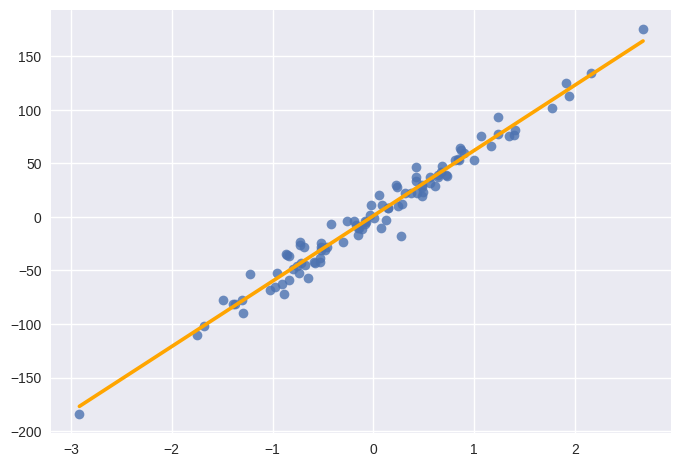

In [9]:
# generate fake data with a linear distribution
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10)
# plot the data and the linear regression line
sns.regplot(x=X, y=y, ci=None, line_kws={'color':'orange'})
plt.show()

Let's start dividing and plotting the data:

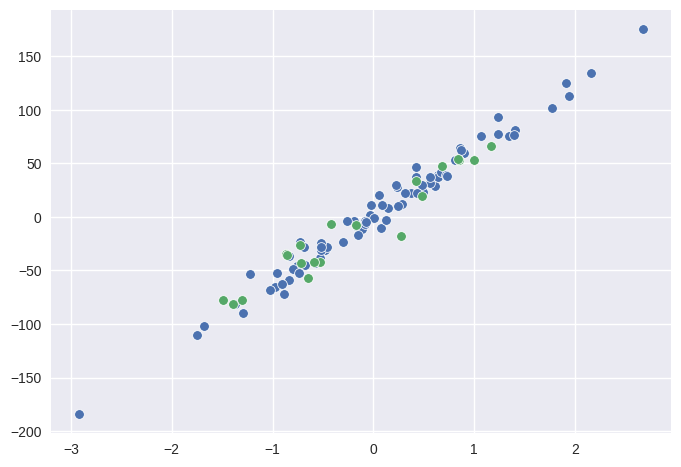

In [10]:
# spit the data in train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=3
)
sns.scatterplot(x=X_train.squeeze(), y=y_train, cmap=cmap)
sns.scatterplot(x=X_val.squeeze(), y=y_val, cmap=cmap)
plt.show()

Let's code the regressor:

In [11]:
class LinearRegressor:

    def __init__(self) -> None:
        self.beta = None
        self.epsilon = 0
    
    def predict(self,
                X: ndarray
                ) -> ndarray:
        yp = np.dot(X, self.beta) + self.epsilon
        return yp

    def _cycle(self,
               X: ndarray,
               y: ndarray,
               lr:int
               ) -> None:
        yp = self.predict(X)
        n = y.shape[0]
        delta = yp - y
        d_beta = 2 * np.sum(X.T * delta.reshape(1,-1)) / n
        d_epsilon = 2 * np.sum(delta) / n
        self.beta -= lr * d_beta
        self.epsilon -= lr * d_epsilon
    
    def fit(self,
            X: ndarray,
            y: ndarray,
            lr: int,
            epochs: int
            ) -> None:
        self.beta = np.zeros(X.shape[1])
        for epoch in range(epochs):
            self._cycle(X, y, lr)
    
    def mse(self,
            y: ndarray,
            yp: ndarray
            ) -> int:
        mse = np.mean(np.square(y-yp))
        return mse

    def fit_n_plot(self,
                   X: ndarray,
                   y: ndarray,
                   lr: int,
                   epochs: int,
                   sleep_time: int = 1
                   ) -> None:
        self.beta = np.zeros(X.shape[1])
        mse_list = []
        for epoch in range(epochs):
            self._cycle(X, y, lr)
            yp = self.predict(X)
            mse = self.mse(y, yp)
            mse_list.append(mse)
            fig, axs = plt.subplots(1, 2, figsize=(16,8))
            axs[1].title.set_text(f'MSE: {mse:.0f}')
            axs[0].title.set_text('Regression line')
            axs[1].set_ylim(ymin=0, ymax=np.max(mse_list))
            axs[1].set_xlim(xmin=0, xmax=epochs)
            linspace = np.linspace(0, epochs)
            axs[1].plot(mse_list, color=cmap.colors[2], linewidth=2)
            sns.scatterplot(x=X.squeeze(), y=y, s=50, cmap=cmap, ax=axs[0])
            sns.lineplot(x=X.squeeze(), y=yp,
                         color='orange', linewidth=3, ax=axs[0]
                         )
            clear_output()
            plt.show()
            sleep(sleep_time)
    
    def pred_n_info(self,
                    X: ndarray,
                    y: ndarray,
                    plot: bool = True
                    ) -> ndarray:
        yp = self.predict(X)
        mse = self.mse(yp, y)
        i = np.random.randint(0, len(y_val)-1)
        print(f'MSE:\t\t\t{mse:.2f}')
        print(f'Sample predicted y:\t{yp[i]:.0f}')
        print(f'Sample actual y:\t{y[i]:.0f}')
        if plot:
            plt.figure(figsize=(10,6))
            sns.scatterplot(x=X.squeeze(), y=y, s=100, cmap=cmap)
            sns.lineplot(x=X.squeeze(), y=yp, color='orange', linewidth=3)
        return yp

Let's see it in action (run the cell, it's animated):

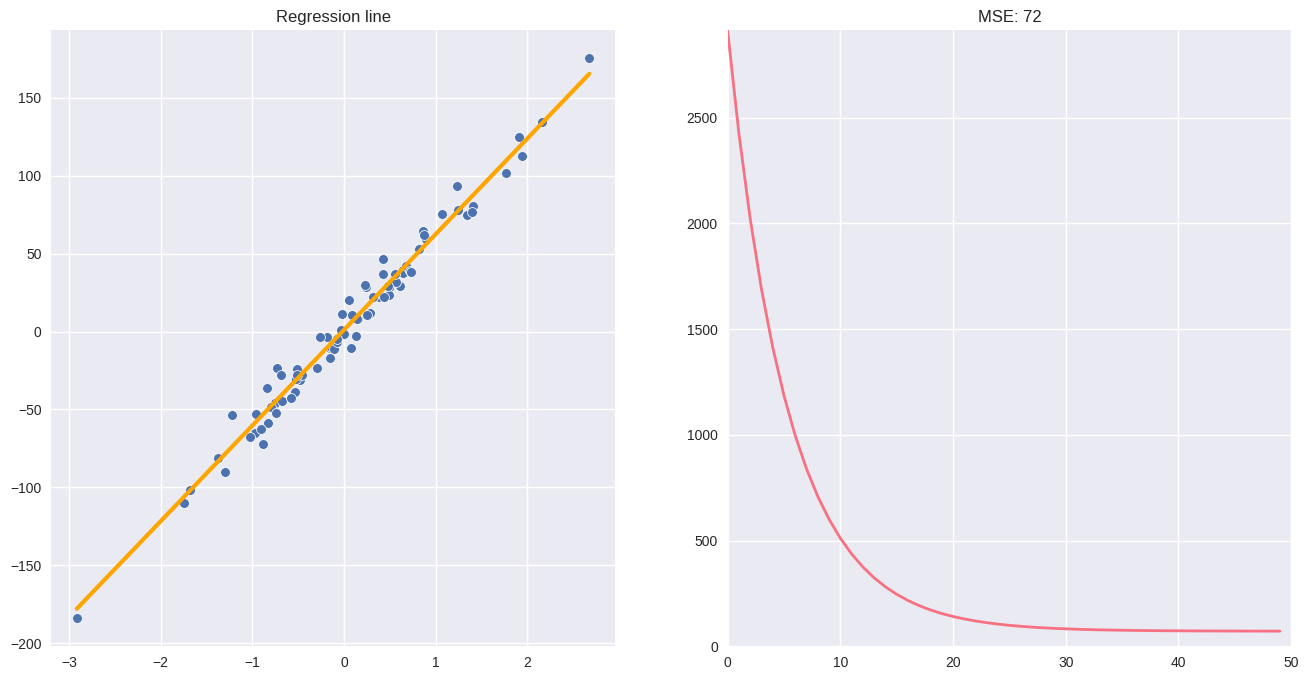

In [12]:
regressor = LinearRegressor()
regressor.fit_n_plot(X_train, y_train, lr=0.05, epochs=50, sleep_time=1)

MSE:			173.76
Sample predicted y:	53
Sample actual y:	53


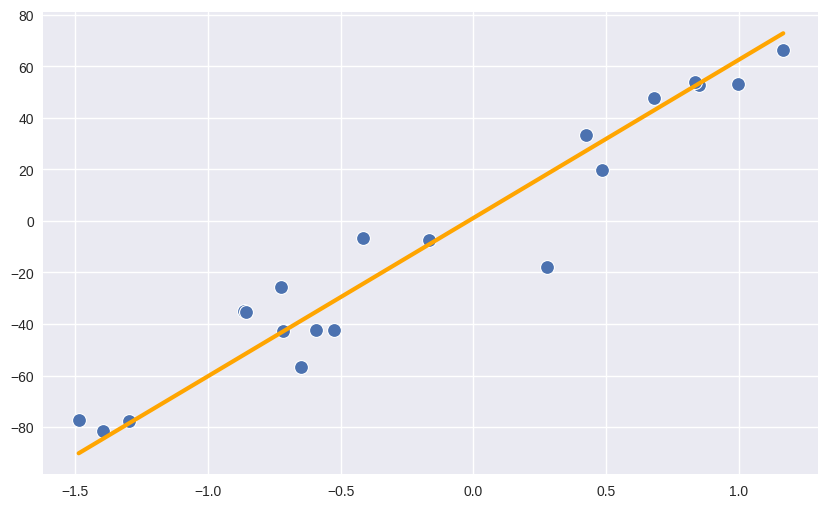

In [13]:
y_pred = regressor.pred_n_info(X_val, y_val)

## Ridge regression

## LASSO regression